# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Kehinde Bayode

<br>

## Please show and display ALL your calculations and results.


In [3]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [4]:

#load data into a Dataframe using Pandas library
data=pd.read_csv("/content/Ulta Skincare Reviews.csv")

def eda(data: pd.DataFrame)-> pd.DataFrame or pd.Series:
    """This function reads a csv file and 
    gives the summary statisticts of a dataset
    
    Params: 
    data (Dataframe) : The data
    
    Returns
    data: Pd.Dataframe or pd.Series 
    """
    print(f"""
          ===dtypes===
          
          {data.dtypes}
          
          ===NaN Values===
          
          {data.isna().sum()}
          
          ====shape=====
          
          The dataset has {data.shape[0]} rows and {data.shape[1]} columns
          
          ===Unique Values in each feature===
          
          {data.nunique()}
          
          
          ====head====
          
          
          
          """)
    return data.head()

In [5]:
eda(data)


          ===dtypes===
          
          Review_Title        object
Review_Text         object
Verified_Buyer      object
Review_Date         object
Review_Location     object
Review_Upvotes       int64
Review_Downvotes     int64
Product             object
Brand               object
Scrape_Date         object
dtype: object
          
          ===NaN Values===
          
          Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64
          
          ====shape=====
          
          The dataset has 4150 rows and 10 columns
          
          ===Unique Values in each feature===
          
          Review_Title        2828
Review_Text         3661
Verified_Buyer         2
Review_Date           41
Review_Location     1423
Review_Upvotes        23
Review_Downvotes      15
Product                4
Bra

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


It is seen from the dataset that there are just a few missing values in `Review_Text` and `Review_Location` Columns. These can be easily replaced by the most frequent values in the column.

Also all the data were scrapped on the same day as there is just one unique value in the `Scrape_Date` column.



In [50]:
#Replace missing values with the most frequent values
columns_with_nan=["Review_Text", "Review_Location"]

for col in columns_with_nan:      #loop through te columns in the list 
    data[col].fillna(data[col].mode()[0], inplace=True)   #fill with the mode
  
#check if the missing values have been replaced

data.isna().sum()

Review_Title        0
Review_Text         0
Verified_Buyer      0
Review_Date         0
Review_Location     0
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

##1. Analyzing the `Review_Title`, `Review_Text`, and `Product` columns using Word Frequency.

The word Frequency let's us see the number of times or Frequency of a word in the column of the Review_Title.

In [22]:
import spacy

In [24]:
nlp= spacy.load("en_core_web_sm")


In [59]:
from collections import Counter

def token_counter(*,data: pd.DataFrame, column : str, n : int)->list:
  """Function to get the Freqency of tokens in a given Column of a Panda Series

  Params: 
  
  Column (Pd.Series) : The column to be processed

  n (int) : The first n numbers with the most frequent occurence

  Returns:
  A list of the token with its corresponding count in the document

  This finction requires Spacy and Counter to be imported
  
  
  """

#Process the text column using SpaCy's NLP pipeline

  processed_docs = list(nlp.pipe(data[column].str.lower()))

# Tokenize the reviews into individual words and get each word frequency or count in the document
#use a counter module
  word_freq = Counter()

  for doc in processed_docs: # for each doc in the processed doc
      for token in doc:      #get the token in each of the doc
        if not (token.is_stop or token.is_punct) : #if the token is not a stop word or punctuation
             
          word_freq[token.text] += 1  #add it to the counter

#Get the 10 most frequent words
  most_common_words = word_freq.most_common(n)
  return most_common_words
  






In [69]:
Review_title=token_counter(data=data, column="Review_Title", n=10)
Review_title

[('love', 738),
 ('product', 727),
 ('skin', 426),
 ('great', 389),
 ('buy', 354),
 ('amazing', 278),
 ('exfoliant', 196),
 ('best', 176),
 ('gentle', 139),
 ('good', 135)]

As seen from the above word Frequency count, most of the words used were positive  and this indicates that the reviewers had a positive sentiment towards the products. The products were referred to as mostly being great. The most commmon as an exfoliant , follwed by being a cleanser. This shows that most customers has issues with cleansing and exfoliating their body.


In [70]:
Review_text=token_counter(data=data, column="Review_Text", n=10)
Review_text

[('skin', 5454),
 ('product', 2633),
 ('use', 1850),
 ('face', 1347),
 ('love', 1296),
 ('smooth', 989),
 ('great', 940),
 ('soft', 874),
 ('like', 849),
 ('feel', 775)]

A word which is frequent and common to both the Review_Text and Review_Title is love. This shows that most customers love the products.

In [71]:
Product=token_counter(data=data, column="Product", n=10)
Product

[('daily', 3000),
 ('superfoliant', 1500),
 ('microfoliant', 1500),
 ('hydro', 800),
 ('masque', 800),
 ('exfoliant', 800),
 ('multi', 350),
 ('vitamin', 350),
 ('thermafoliant', 350)]

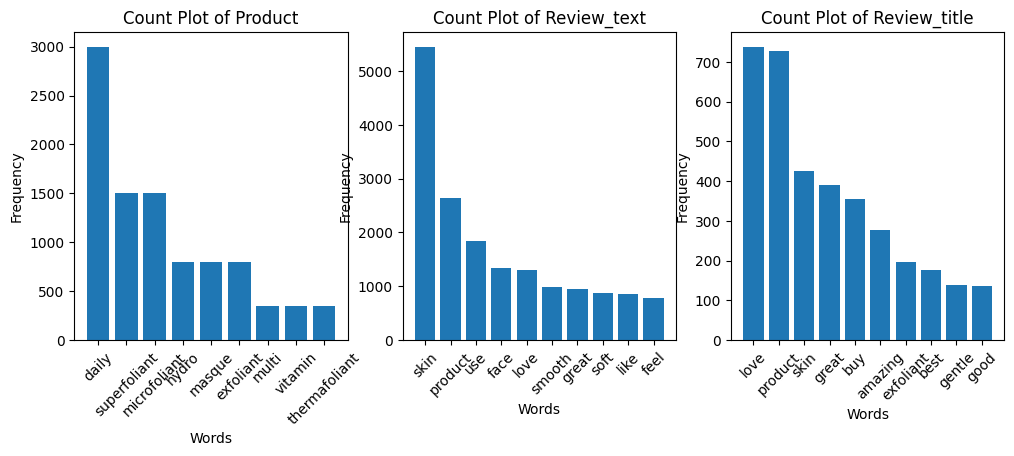

In [79]:

#ploting a bar chart for each of the word Frequecny 
most_common_words=[Product,Review_text,Review_title]
most_common_words_=["Product","Review_text","Review_title"]
# Create subplots for the bar charts
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot a bar chart for each sentence
for i, common_words in enumerate(most_common_words):
    words, freqs = zip(*common_words)
    ax = axes[i]
    ax.bar(words, freqs)
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.set_title(f"Count Plot of {most_common_words_[i]}")
    ax.tick_params(axis='x', rotation=45)

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

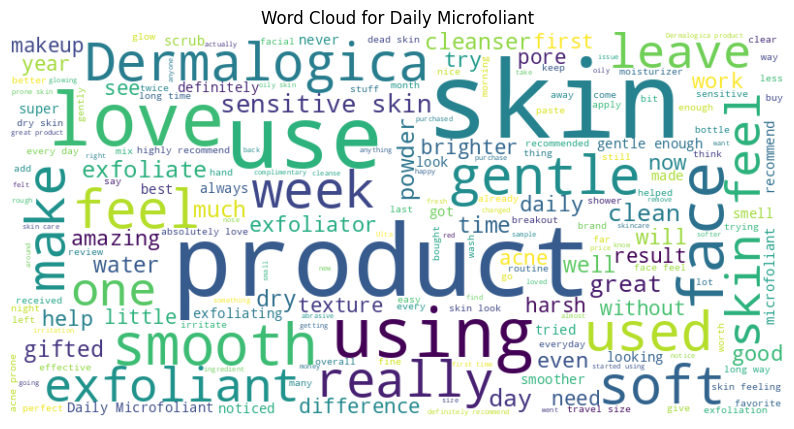

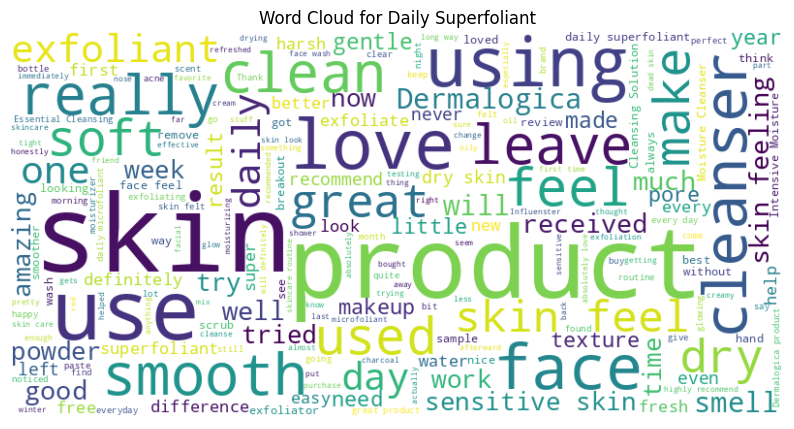

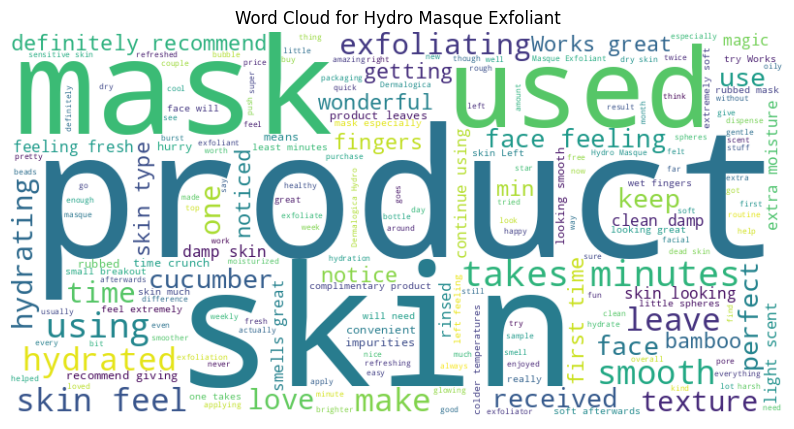

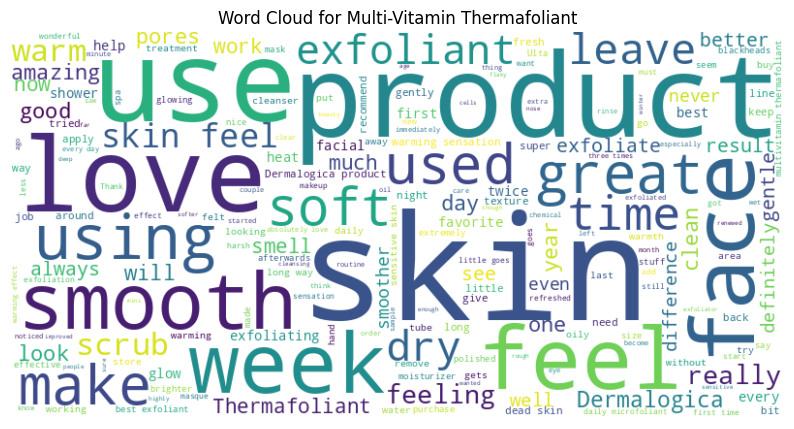

In [83]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Group reviews by product
grouped_reviews = data.groupby('Product')['Review_Text'].apply(' '.join)

# Generate word cloud for each product
for product, reviews in grouped_reviews.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {product}')
    plt.show()


The word cloud visualization shows the most common words for each product, with the most common ones the boldest for each prodcut.

All of the products are all for skin as depicted in the dataset. The products are perceived to be good on the skin as seen from "skin feel" which are complemented with words like gentle.



In [ ]:
The 

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.